In [70]:
import CSIFuncs
from HelperFuncs import *

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.float_format = '{:6f}'.format

import warnings
warnings.filterwarnings("ignore")


## Reading and Processing Nexmon CSI PCAP files
Can also use csiexplorer.py: `python nexmon_csi_analyser/csiexplorer.py`

In [ ]:
dirs = glob("/Volumes/tim_details/tim_honours/CAPTURES/*/*")

for dir in dirs:
    # Getting directory paths
    csi_dir = os.path.join(dir, "csi")
    plot_dir = os.path.join(dir, "csi_plots")
    # Preparing directories
    make_dir(plot_dir)
    clean_dir_junk(csi_dir)
    # Reading each CSI pcap, processing, and saving results
    for fp in os.listdir(csi_dir):
        name = get_name(fp)
        print(f"{dir} - {name}")
        # Getting filepaths
        csi_fp = os.path.join(csi_dir, f"{name}.pcap")
        plot_fp = os.path.join(plot_dir, f"{name}.png")

        # If the plot png already exists, then skip
        if os.path.isfile(plot_fp):
            continue
        
        # Reading csi info (including metadata)
        frames = CSIFuncs.read_csi(csi_fp)
        # Checking that the CSI is valid before continuing
        if CSIFuncs.check_csi(frames["csi"]):
            # Processing csi info
            csi = CSIFuncs.process_csi(frames["csi"], True, True, 5)
            # Making csi amplitude plots
            # fig, axes = CSIFuncs.plot_all(csi)
            # fig.savefig(plot_fp)
            # fig.clf();
plt.close();

## Analysing CSI time-series characteristics (packets per second)

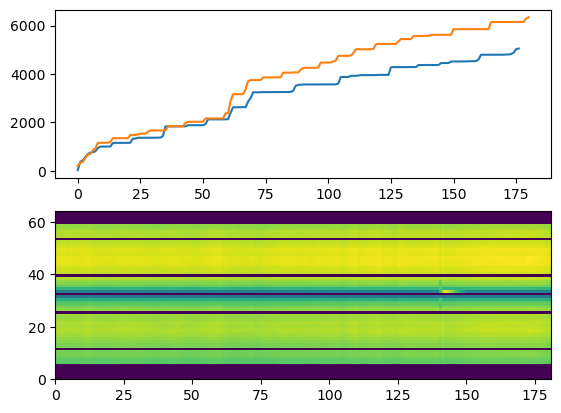

In [71]:
import CSIFuncs
from HelperFuncs import *

def csi_timeseries(fps):
    fig, axes = plt.subplots(nrows=2)
    for fp in fps:
        # Reading csi info (including metadata)
        frames = CSIFuncs.read_csi(fp)
        # Checking that the CSI is valid before continuing
        if CSIFuncs.check_csi(frames["csi"]):
            # Processing csi info
            csi = CSIFuncs.process_csi(frames["csi"], True, True, 5)
        else:
            continue

        # Setting up single capture dataframe
        df = pd.DataFrame(
            {   
                "ts_sec_comb": frames["ts_sec_comb"] - frames["ts_sec_comb"][0],
            },
        )
        # Adding CSI subcarrier vals as columns
        for i in np.arange(csi.shape[1]):
            df[f"subc_{i+1}"] = csi[:, i]

        # Generating time-bins
        interval = 1
        series = df["ts_sec_comb"]
        start = np.floor(series.min())
        end = np.ceil(series.max()) + interval
        bins = np.arange(start, end, interval)
        df["ts_bin"] = pd.cut(series, bins=bins, include_lowest=True, labels=bins[:-1])

        # Grouping and aggregating data on time bins
        agg_dict = {"ts_sec_comb": "count"}
        for i in np.arange(csi.shape[1]):
            agg_dict[f"subc_{i+1}"] = lambda x: np.nanmean(np.abs(x))
        df_binned = df.groupby("ts_bin").agg(agg_dict)
        # df_binned = df_binned.fillna(0)
        df_binned = df_binned.interpolate(method="linear", axis=0)
        df_binned = df_binned.sort_index()
        df_binned["ts_sec_comb_cumsum"] = df_binned["ts_sec_comb"].cumsum()

        # Visualising data:
        # Cumulative packets across time bins
        axes[0].plot(
            df_binned.index,
            df_binned["ts_sec_comb_cumsum"],
        )
        # CSI amplitudes across time (averaged within time bins)
        csi_cols = [f"subc_{i+1}" for i in np.arange(csi.shape[1])]
        axes[1].pcolormesh(
            df_binned[csi_cols].T,
        )
    return fig, axes


fps = glob("/Volumes/tim_details/tim_honours/CAPTURES/client_pc_200/v=A3gUpodXMv0/csi/cap_*.pcap")[:3]
fig, axes = csi_timeseries(fps)

/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_binned = df.groupby("ts_bin").agg(agg_dict)
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:37: RuntimeWarning: Mean of empty slice
  agg_dict[f"subc_{i+1}"] = lambda x: np.nanmean(np.abs(x))
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_binned = df.groupby("ts_bin").agg(agg_dict)
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:37: Ru

THIS IS: /Volumes/tim_details/tim_honours/CAPTURES/client_pc_200/v=3InbMow9IYo


/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/1815906225.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_binned = df.groupby("ts_bin").agg(agg_dict)
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:37: RuntimeWarning: Mean of empty slice
  agg_dict[f"subc_{i+1}"] = lambda x: np.nanmean(np.abs(x))
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future

THIS IS: /Volumes/tim_details/tim_honours/CAPTURES/client_pc_200/v=t634q_Voeto


/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/1815906225.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_binned = df.groupby("ts_bin").agg(agg_dict)
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:37: RuntimeWarning: Mean of empty slice
  agg_dict[f"subc_{i+1}"] = lambda x: np.nanmean(np.abs(x))
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future

THIS IS: /Volumes/tim_details/tim_honours/CAPTURES/client_pc_200/v=yve6qo6eowU


/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/1815906225.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_binned = df.groupby("ts_bin").agg(agg_dict)
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:37: RuntimeWarning: Mean of empty slice
  agg_dict[f"subc_{i+1}"] = lambda x: np.nanmean(np.abs(x))
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future

THIS IS: /Volumes/tim_details/tim_honours/CAPTURES/client_pc_200/v=A3gUpodXMv0


/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/1815906225.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_binned = df.groupby("ts_bin").agg(agg_dict)
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:37: RuntimeWarning: Mean of empty slice
  agg_dict[f"subc_{i+1}"] = lambda x: np.nanmean(np.abs(x))
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future

THIS IS: /Volumes/tim_details/tim_honours/CAPTURES/client_pc_200/v=mkWKZWMokdI


/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/1815906225.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_binned = df.groupby("ts_bin").agg(agg_dict)
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_binned = df.groupby("ts_bin").agg(agg_dict)
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:37: RuntimeWarni

THIS IS: /Volumes/tim_details/tim_honours/CAPTURES/client_pc_200/v=w_oGIbFjiCo


/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/1815906225.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_binned = df.groupby("ts_bin").agg(agg_dict)
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:37: RuntimeWarning: Mean of empty slice
  agg_dict[f"subc_{i+1}"] = lambda x: np.nanmean(np.abs(x))
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future

THIS IS: /Volumes/tim_details/tim_honours/CAPTURES/client_pc_200/v=gxxqdrrpgZc


/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/1815906225.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_binned = df.groupby("ts_bin").agg(agg_dict)
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:37: RuntimeWarning: Mean of empty slice
  agg_dict[f"subc_{i+1}"] = lambda x: np.nanmean(np.abs(x))
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future

THIS IS: /Volumes/tim_details/tim_honours/CAPTURES/client_pc_200/v=NSW5u1RTxEA


/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/1815906225.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_binned = df.groupby("ts_bin").agg(agg_dict)
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:37: RuntimeWarning: Mean of empty slice
  agg_dict[f"subc_{i+1}"] = lambda x: np.nanmean(np.abs(x))
/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/3667822930.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future

THIS IS: /Volumes/tim_details/tim_honours/CAPTURES/client_pc_200/v=t6jlhqNxRYk


/var/folders/pl/lgb9wb2n3jg3rqy1vm1dqd800000gn/T/ipykernel_31416/1815906225.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


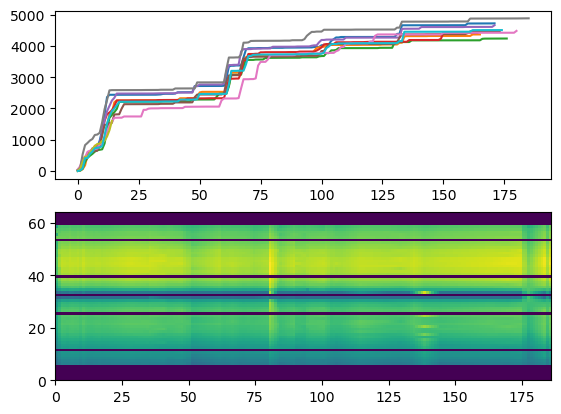

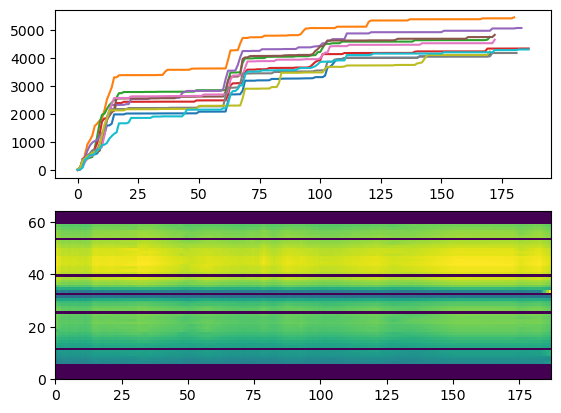

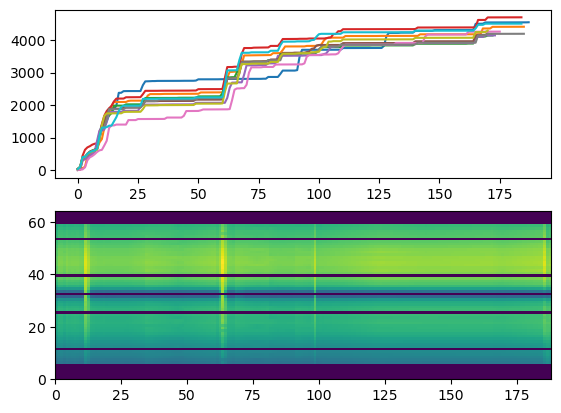

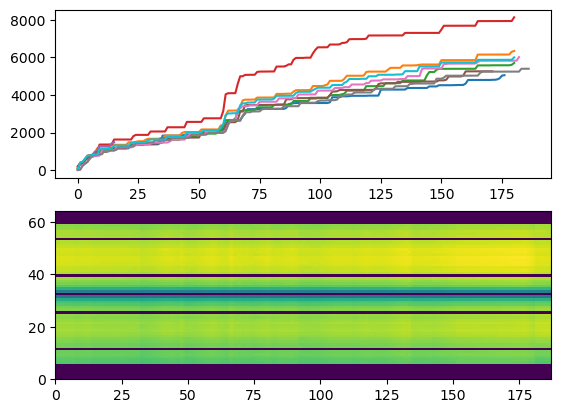

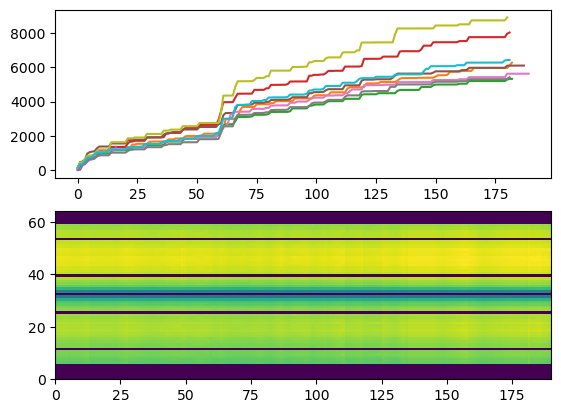

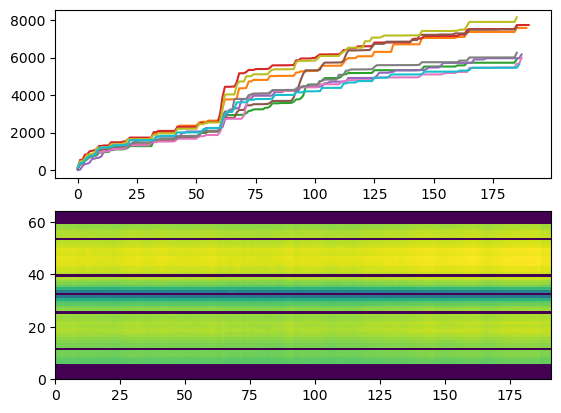

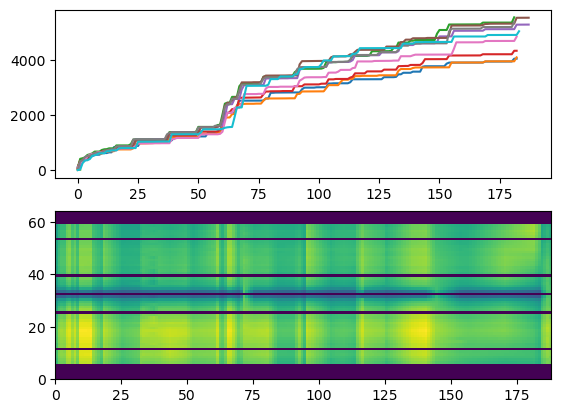

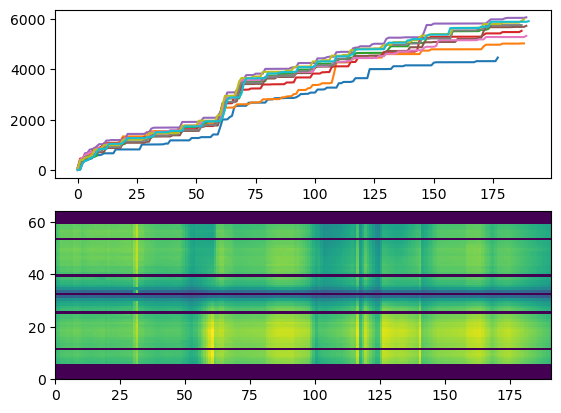

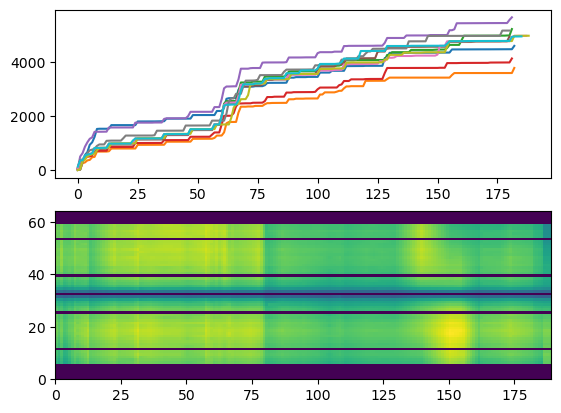

In [61]:
dirs = glob("/Volumes/tim_details/tim_honours/CAPTURES/client_pc_200/*")
for dir in dirs:
    fps = glob(f"{dir}/csi/cap_*.pcap")[:10]
    fig, axes = csi_timeseries(fps)
    print(f"THIS IS: {dir}")
    fig.show()

## Getting summaries of CSI data

In [ ]:
# GETTING SUMMARIES OF A DIRECTORY OF CAPTURES:
# nfiles, nframes, statistics
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import CSIFuncs

dirs = glob("/Volumes/tim_details/tim_honours/CAPTURES/*/*")
dirs = ["/Volumes/tim_details/tim_honours/CAPTURES/client_pi_200/v=mkWKZWMokdI"]

# Getting a summary of each different CSI experiment setup
res_arr = {}
for dir in dirs:
    print(dir)
    fps = glob(os.path.join(dir, "csi/*"))
    res_arr[dir] = CSIFuncs.get_summaries(fps)

fig, ax = plt.subplots()
for i in res_arr:
    res = res_arr[i]
    ax.hist(
        res["nframes"],
        alpha=0.2,
        label=f"{i}",
    )
# plt.legend()

## Combining CSI from each label combination into an array of 2D arrays
- 0 axis: The individual csi capture matrix (i.e. the file)
- 1 axis: The frames (note: must be trimmed or padded - same size across all)
- 2 axis: The subcarrier


In [ ]:
import pandas as pd
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import CSIFuncs

dirs = glob("/Volumes/tim_details/tim_honours/CAPTURES/*/*")
nframes = 10000

for dir in dirs:
    print(dir)
    fps = glob(os.path.join(dir, "csi/*"))
    comb_csi = CSIFuncs.combine_csis(fps, nframes)
    np.save(os.path.join(dir, "csi_all.npy"), comb_csi)

# fig, ax = plt.subplots()
# CSIFuncs.hist2d_subc(np.abs(csi), fig, ax)
# fig, ax = plt.subplots()
# CSIFuncs.hist2d_complex(csi, fig, ax)
# CSIFuncs.plot_all(csi)

In [ ]:
x = np.load("/Volumes/tim_details/tim_honours/CAPTURES/client_pi_200_wall/v=t6jlhqNxRYk/csi_all.npy")
x.shape